# 1.0 Getting Started with Kaggle

## 1.1 Introduction to Kaggle




[Kaggle](https://www.kaggle.com/) is a site where people create algorithms and compete against machine learning practitioners around the world. Your algorithm wins the competition if it's the most accurate on a particular data set. Kaggle is a fun way to practice your machine learning skills.

In this lesson we're going to learn how to compete in Kaggle competitions. In this introductory first section we'll learn how to:

- Approach a Kaggle competition
- Explore the competition data and learn about the competition topic
- Prepare data for machine learning
- Train a model
- Measure the accuracy of your model
- Prepare and make your first Kaggle submission.

Kaggle has created a number of competitions designed for beginners. The most popular of these competitions, and the one we'll be looking at, is about predicting which [passengers survived the sinking of the Titanic](https://en.wikipedia.org/wiki/Sinking_of_the_RMS_Titanic).

In this competition, we have a data set of different information about passengers onboard the Titanic, and we see if we can use that information to predict whether those people survived or not. Before we start looking at this specific competition, let's take a moment to understand how Kaggle competitions work.

Each Kaggle competition has two key data files that you will work with - a **training set** and a **testing set**.

The training set contains data we can use to train our model. It has a number of feature columns which contain various descriptive data, as well as a column of the target values we are trying to predict: in this case, **Survival**.

The testing set contains all of the same feature columns, but is missing the target value column. Additionally, the testing set usually has fewer observations (rows) than the training set.

<img width="500" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1ESRBXN3nOU5H3_WxljfLiDBjfXdgzyfM">

This is useful because we want as much data as we can to train our model on. Once we have trained our model on the training set, we will use that model to make predictions on the data from the testing set, and submit those predictions to Kaggle.

[In this competition](https://www.kaggle.com/c/titanic/data), the two files are named **test.csv** and **train.csv**. 

Let's take the following steps:

1. Load Libraries
2. Get data, including EDA
3. Clean, prepare and manipulate Data (feature engineering)
4. Modeling (train and test)
5. Algorithm Tuning
6. Creating a submission file

## 1.2 Load Libraries

In [0]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objects as go
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
import time
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from google.colab import files
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
import numpy as np

## 1.3 Get data, including EDA

In [3]:
# load the datasets
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

print("Train size: {0}\nTest size: {1}".format(train.shape,test.shape))

Train size: (891, 12)
Test size: (418, 11)


### 1.3.1 First look at the dataset


The files we read in the previous screen are available on [the data page for the Titanic competition on Kaggle](https://www.kaggle.com/c/titanic/data). That page also has a **data dictionary**, which explains the various columns that make up the data set. Below are the descriptions contained in that data dictionary:

- **PassengerID** - A column added by Kaggle to identify each row and make submissions easier
- **Survived** - Whether the passenger survived or not and the value we are predicting (0=No, 1=Yes)
- **Pclass** - The class of the ticket the passenger purchased (1=1st, 2=2nd, 3=3rd)
- **Sex** - The passenger's sex
- **Age** - The passenger's age in years
- **SibSp** - The number of siblings or spouses the passenger had aboard the Titanic
- **Parch** - The number of parents or children the passenger had aboard the Titanic
- **Ticket** - The passenger's ticket number
- **Fare** - The fare the passenger paid
- **Cabin** - The passenger's cabin number
- **Embarked** - The port where the passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)

The data page on Kaggle has some additional notes about some of the columns. It's always worth exploring this in detail to get a full understanding of the data.

The first 5 rows of the data is below:

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [0]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

**Hypothesis #01**

> The simplest strategy of guessing that all died since the majority died.


### 1.3.2 Missing values?

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

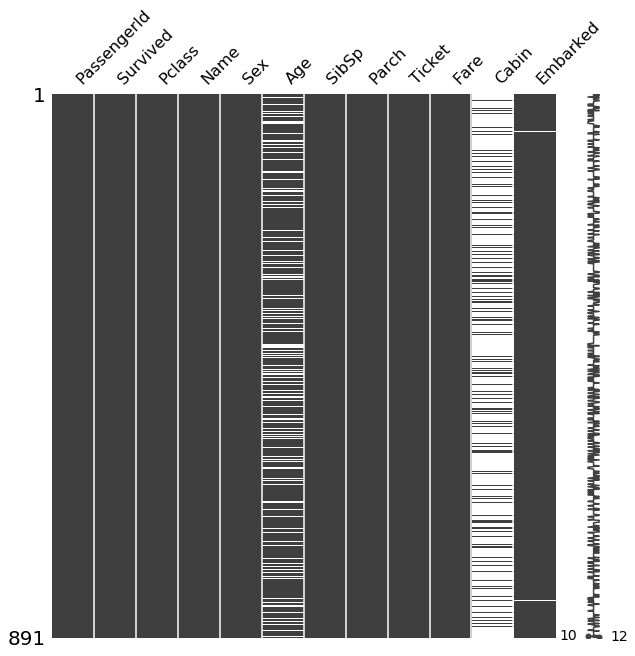

In [0]:
msno.matrix(train,figsize=(10,10))
train.isnull().sum()/train.shape[0]

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

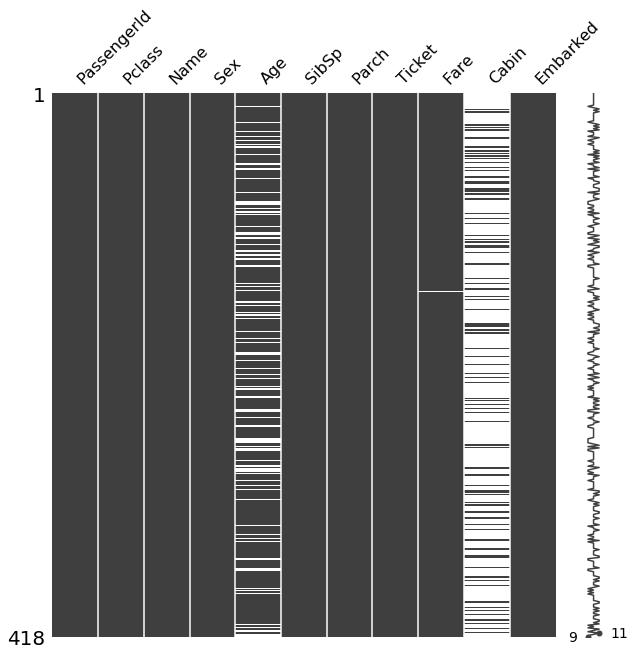

In [0]:
msno.matrix(test,figsize=(10,10))
test.isnull().sum()/test.shape[0]

### 1.3.3 "Women and children first"

**Hypothesis**: females survived in much higher proportions than males did?

The type of machine learning we will be doing is called **classification**, because when we make predictions we are classifying each passenger as survived or not. More specifically, we are performing **binary classification**, which means that there are only two different states we are classifying.

In any machine learning exercise, thinking about the topic you are predicting is very important. We call this step acquiring domain knowledge, and it's one of the most important determinants for success in machine learning.

In this case, understanding the Titanic disaster and specifically what variables might affect the outcome of survival is important. Anyone who has watched the movie Titanic would remember that women and children were given preference to lifeboats (as they were in real life). You would also remember the vast class disparity of the passengers.

This indicates that **Age**, **Sex**, and **PClass** may be good predictors of survival. We'll start by exploring **Sex** and **Pclass** by visualizing the data.

Because the **Survived** column contains 0 if the passenger did not survive and 1 if they did, we can segment our data by sex and calculate the mean of this column. We can use **DataFrame.pivot_table()** to easily do this:




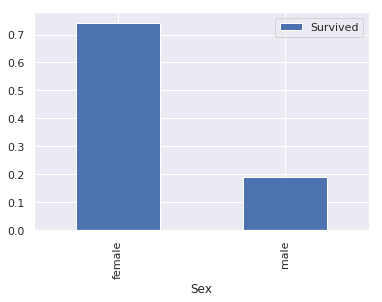

In [0]:
sns.set()

sex_pivot = train.pivot_table(index="Sex",values="Survived")
sex_pivot.plot.bar()
plt.show()

**Hypothesis #02**

> Since roughly 75% of females survived and roughly only 20% of males survived, what’s the score when you guess all females survived and all males perished?

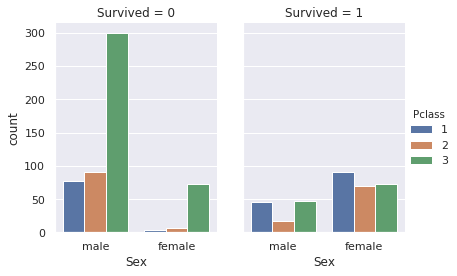

In [0]:
g = sns.catplot(x="Sex", 
                hue="Pclass", 
                col="Survived",
                data=train, kind="count",
                height=4, aspect=.7)

In [0]:
# there are more male than female
print(train.Sex.value_counts())

male      577
female    314
Name: Sex, dtype: int64


In [0]:
# Age column stats
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

The **Age** column contains numbers ranging from 0.42 to 80.0 (If you look at Kaggle's data page, it informs us that Age is fractional if the passenger is less than one). The other thing to note here is that there are 714 values in this column, fewer than the 891 rows we discovered that the train data set had earlier in this mission which indicates we have some missing values.

All of this means that the **Age column needs to be treated slightly differently**, as this is a continuous numerical column. One way to look at distribution of values in a continuous numerical set is to use histograms. We can create kde plots to compare visually the those that survived vs those who died across different age ranges and classes.

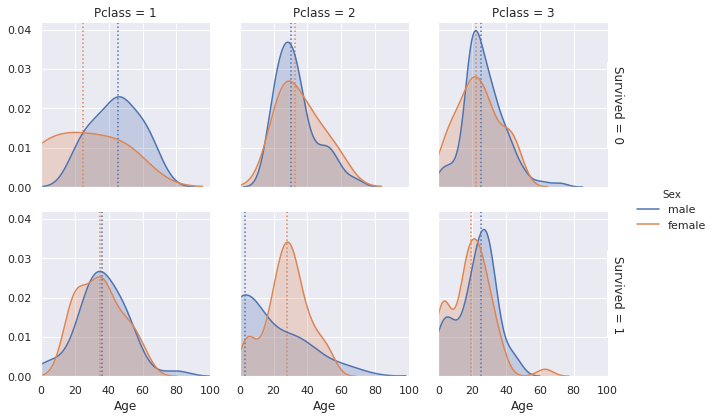

In [0]:
def plot_median(data,**kwargs):
    m = data.median()
    plt.axvline(m, **kwargs,)

g = sns.FacetGrid(train, 
                  col="Pclass", 
                  row="Survived", hue="Sex",margin_titles=True)
g.map(plot_median, 'Age', ls=":")
g.map(sns.kdeplot, "Age", shade=True).add_legend()

plt.xlim(0,100)
plt.show()

In [0]:
# just to test a hypothesis
aux = train.copy()
aux["Sex"] = pd.Categorical(aux.Sex).codes
aux["Embarked"] = pd.Categorical(aux.Embarked).codes

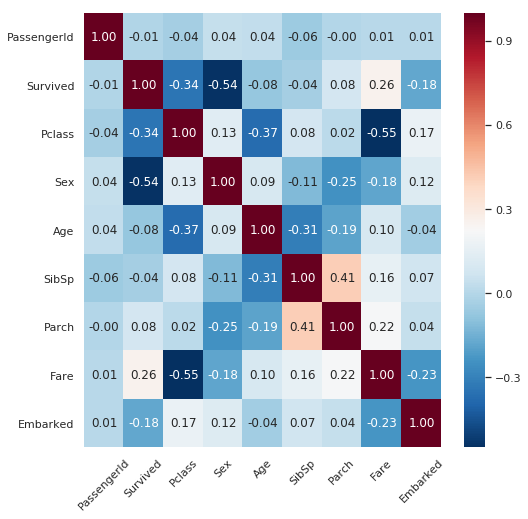

In [0]:
plt.figure(figsize = (8,8))
sns.heatmap(aux.corr(),cmap=("RdBu_r"),annot=True,fmt='.2f')
plt.xticks(rotation=45) 
plt.show()

## 1.4 Clean, prepare and manipulate Data (feature engineering)


The relationship here is not simple, but we can see that in some age ranges more passengers survived.


In order for this to be useful to our machine learning model, we can separate this continuous feature into a categorical feature by dividing it into ranges. We can use the [pandas.cut() function](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html) to help us out.

The **pandas.cut()** function has two required parameters - the column we wish to cut, and a list of numbers which define the boundaries of our cuts. We are also going to use the optional parameter **labels**, which takes a list of labels for the resultant bins. This will make it easier for us to understand our results.

Before we modify this column, we have to be aware of two things. Firstly, any change we make to the **train** data, we also need to make to the **test** data, otherwise we will be unable to use our model to make predictions for our submissions. Secondly, we need to remember to handle the missing values we observed above.

In the example below, we create a function that:

- uses the [pandas.fillna()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.fillna.html) method to fill all of the missing values with -0.5
- cuts the **Age** column into: 
  - **Missing**, from -1 to 0
  - **Infant**, from 0 to 5
  - **Child**, from 5 to 12
  - **Teenager**, from 12 to 18
  - **Young Adult**, from 18 to 35
  - **Adult**, from 35 to 60
  - **Senior**, from 60 to 100

In [0]:
aux = train.copy()

# fill missing values with -0.5
aux["Age"] = aux["Age"].fillna(-0.5)

# divide age column into a range of values
cut_points = [-1,0,5,12,18,35,60,100]
label_names = ["Missing","Infant","Child",
               "Teenager","Young Adult","Adult","Senior"]
aux["Age_categories"] = pd.cut(aux["Age"],
                                 cut_points,
                                 labels=label_names)

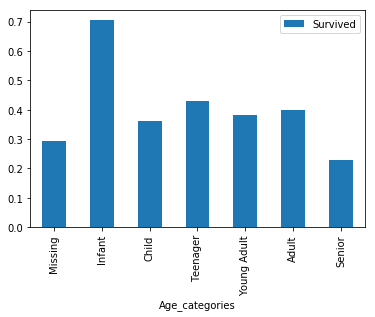

In [0]:
pivot = aux.pivot_table(index="Age_categories",values='Survived')
pivot.plot.bar()
plt.show()

In [0]:
#import plotly.express as px
#tips = px.data.tips()
#fig = px.parallel_categories(train[["Sex","Pclass","Age_categories","Survived"]],
#                             color="Survived", 
#                             color_continuous_scale=px.colors.sequential.Sunsetdark)
#
#fig.show()

In [0]:
aux.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult


In [0]:
aux[aux.Age_categories == "Adult"].Name

In [0]:
titanic_df = aux.copy()

# Create dimensions
age_cat_dim = go.parcats.Dimension(values=titanic_df.Age_categories, label="Age")

gender_dim = go.parcats.Dimension(values=titanic_df.Sex, label="Gender")

class_dim = go.parcats.Dimension(
    values=titanic_df.Pclass,
    categoryorder='category ascending', label="Class"
)

survival_dim = go.parcats.Dimension(
    values=titanic_df.Survived, label="Outcome", categoryarray=[0, 1], 
    ticktext=['perished', 'survived']
)

# Create parcats trace
color = titanic_df.Survived
colorscale = [[0, 'lightsteelblue'], [1, 'mediumseagreen']]

fig = go.Figure(data = [go.Parcats(dimensions=[gender_dim,class_dim, age_cat_dim,survival_dim],
        line={'color': color, 'colorscale': colorscale},
        hoveron='color', hoverinfo='all',
        labelfont={'size': 18, 'family': 'Times'},
        tickfont={'size': 16, 'family': 'Times'},bundlecolors=True, 
        arrangement='freeform')])
fig.update_layout(width=800,height=500)

fig.show()



So far we have identified three columns that may be useful for predicting survival:

- **Sex**
- **Pclass**
- **Age**, or more specifically our newly created **Age_categories**

Before we build our model, we need to prepare these columns for machine learning. Most machine learning algorithms can't understand text labels, so we have to convert our values into numbers.

Additionally, we need to be careful that we don't imply any numeric relationship where there isn't one. If we think of the values in the **Pclass** column, we know they are 1, 2, and 3. 

While the class of each passenger certainly has some sort of ordered relationship, the relationship between each class is not the same as the relationship between the numbers 1, 2, and 3. For instance, class 2 isn't "worth" double what class 1 is, and class 3 isn't "worth" triple what class 1 is.

In order to remove this relationship, we can create **dummy columns** for each unique value in **Pclass**:


<img width="600" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1mJhXisviXzGYN-rPwHKeoR32qgYRMJC-">

Rather than doing this manually, we can use the [**pandas.get_dummies()**](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) function, which will generate columns shown in the diagram above.

The following code creates a function to create the dummy columns for the **Pclass** column and add it back to the original dataframe. It then applies that function the **train** and **test** dataframes.


In [0]:
def create_dummies(df,column_name):
    # drop_first = True to avoid colinearity
    dummies = pd.get_dummies(df[column_name],
                             prefix=column_name,
                             drop_first=True)
    df = pd.concat([df,dummies],axis=1)
    return df

aux = create_dummies(aux,"Pclass")
aux = create_dummies(aux,"Age_categories")
aux = create_dummies(aux,"Sex")

In [0]:
aux.head()

### 1.4.1 Feature Selector

In [0]:
#Custom Transformer that extracts columns passed as argument to its constructor 
class FeatureSelector(BaseEstimator, TransformerMixin ):
  #Class Constructor 
  def __init__( self, feature_names ):
    self.feature_names = feature_names 
    
  #Return self nothing else to do here    
  def fit( self, X, y = None ):
    return self 
    
  #Method that describes what we need this transformer to do
  def transform(self, X, y = None):
    return X[self.feature_names]

### 1.4.2 Categorical Pipeline

In [0]:
#converts certain features to categorical
class CategoricalTransformer(BaseEstimator, TransformerMixin):
  def __init__(self, model=0):
    """Class constructor method that take: 
    model: 
      - 0: Sex column (categorized), Pclass (raw)
      - 1: Sex column (get_dummies(drop_first=True)), Pclass (raw)
      - 2: Sex column (get_dummies(drop_first=True)), Pclass (get_dummies(drop_first=False))
      - 3: Sex column (get_dummies(drop_first=True)), Pclass (raw), Age (get_dummies(drop_first=False))
      - 4: Sex column (get_dummies(drop_first=True)), Pclass (raw), Embarked (categorized)
      - 5: Sex column (get_dummies(drop_first=True)), Pclass (raw), Embarked (get_dummies(drop_first=False))
      - 6: New Sex column (get_dummies(drop_first=False)), Pclass (raw), Embarked (get_dummies(drop_first=False))
      - 7: New Sex column (get_dummies(drop_first=True)), Pclass (raw), Embarked (get_dummies(drop_first=False))
      - 8: New Sex column (get_dummies(drop_first=True)), Pclass (raw), Family_Size
      - 9: New Sex column (get_dummies(drop_first=True)), Pclass (raw), Family_Size, Embarked (get_dummies(drop_first=False))
    """
    self.model = model

  #Return self nothing else to do here    
  def fit( self, X, y = None ):
    return self 

  def create_dummies(self, df, column_name, drop_first_col):
    """Create Dummy Columns from a single Column
    """
    dummies = pd.get_dummies(df[column_name],prefix=column_name, drop_first=drop_first_col)
    return dummies

  def process_family_size(self, df):
    df["Title"] = df["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)
    titles = {
        "Mr" :         "man",
        "Mme":         "woman",
        "Ms":          "woman",
        "Mrs" :        "woman",
        "Master" :     "boy",
        "Mlle":        "woman",
        "Miss" :       "woman",
        "Capt":        "man",
        "Col":         "man",
        "Major":       "man",
        "Dr":          "man",
        "Rev":         "man",
        "Jonkheer":    "man",
        "Don":         "man",
        "Sir" :        "man",
        "Countess":    "woman",
        "Dona":        "woman",
        "Lady" :       "woman"
    } 

    # new gender: man, woman, boy
    df["Gender"] = df["Title"].map(titles)

    # family surname
    df["family"] = df["Name"].str.extract('([A-Za-z]+)\,',expand=False)

    # count the number of boy and women by family
    boy_women = df[df["Gender"] != "man"].groupby(by=["family"])["Name"].agg("count")

    # fill with zero that passengers are traveling alone or with family without boy and women
    df["family_size"] = df["family"].map(boy_women).fillna(0.0)

    if self.model in [8,9]:
      return pd.DataFrame(df["family_size"],columns=["family_size"])
    else:
      return None

  def process_sex(self, df):
    df["Title"] = df["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)
    titles = {
        "Mr" :         "man",
        "Mme":         "woman",
        "Ms":          "woman",
        "Mrs" :        "woman",
        "Master" :     "boy",
        "Mlle":        "woman",
        "Miss" :       "woman",
        "Capt":        "man",
        "Col":         "man",
        "Major":       "man",
        "Dr":          "man",
        "Rev":         "man",
        "Jonkheer":    "man",
        "Don":         "man",
        "Sir" :        "man",
        "Countess":    "woman",
        "Dona":        "woman",
        "Lady" :       "woman"
    }
    
    if self.model == 0:
      df["Sex"] = pd.Categorical(df.Sex).codes
      return pd.DataFrame(df["Sex"],columns=["Sex"])
    elif self.model in [1,2,3,4,5]:  
      sex_dummies = self.create_dummies(df,"Sex",True)
      return sex_dummies
    elif self.model == 6:
      df["Sex"] = df["Title"].map(titles)
      sex_dummies = self.create_dummies(df,"Sex",False)
      return sex_dummies
    elif self.model in [7,8,9]:
      df["Sex"] = df["Title"].map(titles)
      sex_dummies = self.create_dummies(df,"Sex",False)
      sex_dummies.drop(labels="Sex_woman",axis=1,inplace=True)
      return sex_dummies
    else:
      return None

  def process_embarked(self, df):
    if self.model in [0,1,2,3,8]:
      return None
    elif self.model == 4:
      # fill null values using the mode
      df["Embarked"].fillna("S",inplace=True)
      df["Embarked"] = pd.Categorical(df.Embarked).codes
      return pd.DataFrame(df["Embarked"],columns=["Embarked"])
    elif self.model in [5,6,7,9]:
      df["Embarked"].fillna("S",inplace=True)
      embarked_dummies = self.create_dummies(df,"Embarked",False)
      return embarked_dummies

  #Transformer method we wrote for this transformer 
  def transform(self, X , y = None ):
    df = X.copy()
    sex = self.process_sex(df)
    embarked = self.process_embarked(df)
    family_size = self.process_family_size(df)

    if self.model in [0,1,2,3]:
      return sex
    elif self.model in [4,5,6,7]:
      return pd.concat([sex,embarked],axis=1)
    elif self.model == 8:
      return pd.concat([sex,family_size],axis=1)
    elif self.model == 9:
      return pd.concat([sex,family_size,embarked],axis=1)
    else:
      return None

In [261]:
# for validation purposes only
select = FeatureSelector(train.select_dtypes(include=["object"]).columns).transform(train)

# change the value of model 0,1,2,3,....7
model = CategoricalTransformer(model=9)
df_cat = model.transform(select)
cat_cols_final = df_cat.columns
df_cat.head()

,Sex_boy,Sex_man,family_size,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0.0,0,0,1
1,0,0,1.0,1,0,0
2,0,0,1.0,0,0,1
3,0,0,1.0,0,0,1
4,0,1,1.0,0,0,1


In [223]:
cat_cols_final

Index(['Sex_boy', 'Sex_man', 'family_size'], dtype='object')

### 1.4.3 Numerical Pipeline

In [0]:
#converts certain features to categorical
class NumericalTransformer(BaseEstimator, TransformerMixin):
  def __init__(self, model=0):
    """Class constructor method that take: 
    model: 
      - 0: Sex column (categorized), Pclass (raw)
      - 1: Sex column (get_dummies(drop_first=True)), Pclass (raw)
      - 2: Sex column (get_dummies(drop_first=True)), Pclass (get_dummies(drop_first=False))
      - 3: Sex column (get_dummies(drop_first=True)), Pclass (raw), Age (get_dummies(drop_first=False))
      - 4: Sex column (get_dummies(drop_first=True)), Pclass (raw), Embarked (categorized)
      - 5: Sex column (get_dummies(drop_first=True)), Pclass (raw), Embarked (get_dummies(drop_first=False))
      - 6: New Sex column (get_dummies(drop_first=False)), Pclass (raw), Embarked (get_dummies(drop_first=False))
      - 7: New Sex column (get_dummies(drop_first=True)), Pclass (raw), Embarked (get_dummies(drop_first=False))
      - 8: New Sex column (get_dummies(drop_first=True)), Pclass (raw), Family_Size
      - 9: New Sex column (get_dummies(drop_first=True)), Pclass (raw), Family_Size, Embarked (get_dummies(drop_first=False))
    """
    self.model = model

  #Return self nothing else to do here    
  def fit( self, X, y = None ):
    return self 

  def create_dummies(self, df, column_name, drop_first_col):
    """Create Dummy Columns from a single Column
    """
    dummies = pd.get_dummies(df[column_name],prefix=column_name, drop_first=drop_first_col)
    return dummies

  # manipulate column "Age"
  def process_age(self, df):
    # fill missing values with -0.5
    df["Age"] = df["Age"].fillna(-0.5)

    # divide age column into a range of values
    cut_points = [-1,0,5,12,18,35,60,100]
    label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]
    df["Age_categories"] = pd.cut(df["Age"],
                                 cut_points,
                                 labels=label_names)
    if self.model in [0,1,2,6,7,8,9]:
      return None
    elif self.model == 3:
      return self.create_dummies(df,"Age_categories",False)
   
  def process_pclass(self, df):
    if self.model in [0,1,3,4,5,6,7,8,9]:
      return pd.DataFrame(df["Pclass"],columns=["Pclass"])
    elif self.model == 2:
      return self.create_dummies(df,"Pclass",False)
    else:
      return None
        
  #Transformer method we wrote for this transformer 
  def transform(self, X , y = None ):
    df = X.copy()

    age = self.process_age(df)  
    pclass = self.process_pclass(df)
    
    if self.model in [0,1,2,4,5,6,7,8,9]:
      return pclass
    elif self.model == 3:
      return pd.concat([pclass,age],axis=1)
    else:
      return None

In [262]:
# for validation purposes only
select = FeatureSelector(train.drop(labels=["Survived"],axis=1).select_dtypes(include=["int64","float64"]).columns).transform(train)

# change model to 0,1,2,3, ..., 7
model = NumericalTransformer(model=9)
df = model.transform(select)
num_cols_final = df.columns
df.head()

,Pclass
0,3
1,1
2,3
3,1
4,3


In [0]:
num_cols_final

Index(['Pclass'], dtype='object')

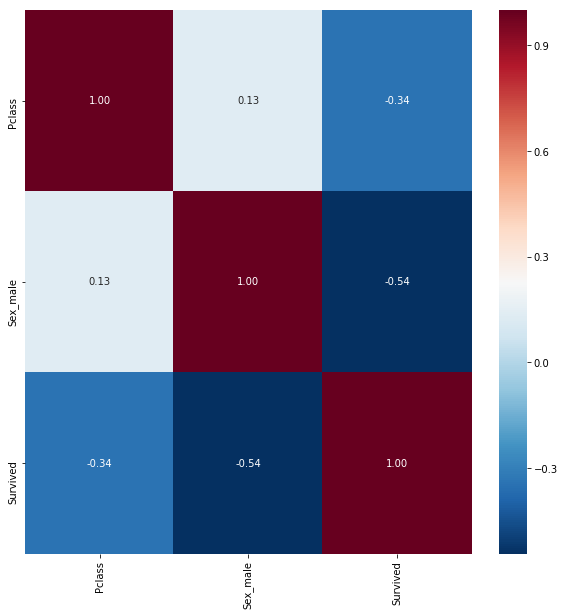

In [0]:
plt.figure(figsize = (10,10))
sns.heatmap(pd.concat([df.select_dtypes(include=["int64","uint8"]),
                       df_cat.select_dtypes(include=["int64","uint8"]),
                       train.Survived],axis=1).corr(),cmap=("RdBu_r"),annot=True,fmt='.2f')
plt.xticks(rotation=90) 
plt.show()

In [0]:
pd.concat([df.select_dtypes(include=["int64","uint8"]),
                       df_cat.select_dtypes(include=["int64","uint8"]),
                       train.Survived],axis=1).corr()["Survived"].abs().sort_values()

Pclass      0.338481
Sex_male    0.543351
Survived    1.000000
Name: Survived, dtype: float64

## 1.5 Modeling (train and test)

In [0]:
# global varibles
seed = 42
num_folds = 10
scoring = {'Accuracy': make_scorer(accuracy_score)}

In [0]:
# load the datasets
train = pd.read_csv("train.csv")

# split-out train/validation and test dataset
X_train, X_test, y_train, y_test = train_test_split(train.drop(labels="Survived",axis=1),
                                                    train["Survived"],
                                                    test_size=0.20,
                                                    random_state=seed,
                                                    shuffle=True,
                                                    stratify=train["Survived"])

In [0]:
# Categrical features to pass down the categorical pipeline 
categorical_features = X_train.select_dtypes(include=["object"]).columns

# Numerical features to pass down the numerical pipeline 
numerical_features = X_train.select_dtypes(include=["int64","float64"]).columns

# Defining the steps in the categorical pipeline 
categorical_pipeline = Pipeline(steps = [('cat_selector', FeatureSelector(categorical_features)),
                                         ('cat_transformer', CategoricalTransformer(model=9))
                                         ]
                                )
# Defining the steps in the numerical pipeline     
numerical_pipeline = Pipeline(steps = [('num_selector', FeatureSelector(numerical_features)),
                                       ('num_transformer', NumericalTransformer(model=9)) 
                                       ]
                              )

# Combining numerical and categorical piepline into one full big pipeline horizontally 
# using FeatureUnion
full_pipeline_preprocessing = FeatureUnion(transformer_list = [('categorical_pipeline', categorical_pipeline),
                                                               ('numerical_pipeline', numerical_pipeline)
                                                               ]
                                           )

In [266]:
# for validate purposes
new_data = full_pipeline_preprocessing.fit_transform(X_train)
new_data_df = pd.DataFrame(new_data,)#columns=cat_cols_final.tolist() + num_cols_final.tolist())
new_data_df.head()

,0,1,2,3,4,5,6
0,0.0,1.0,0.0,0.0,0.0,1.0,3.0
1,0.0,1.0,0.0,0.0,0.0,1.0,2.0
2,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,0.0,0.0,1.0,0.0,0.0,1.0,3.0
4,0.0,0.0,2.0,0.0,0.0,1.0,2.0


## 1.6 Algorithm Tuning

In [274]:
"""
    model: 
      - 0: Sex column (categorized), Pclass (raw)
      - 1: Sex column (get_dummies(drop_first=True)), Pclass (raw)
      - 2: Sex column (get_dummies(drop_first=True)), Pclass (get_dummies(drop_first=False))
      - 3: Sex column (get_dummies(drop_first=True)), Pclass (raw), Age (get_dummies(drop_first=False))
      - 4: Sex column (get_dummies(drop_first=True)), Pclass (raw), Embarked (categorized)
      - 5: Sex column (get_dummies(drop_first=True)), Pclass (raw), Embarked (get_dummies(drop_first=False))
      - 6: New Sex column (get_dummies(drop_first=False)), Pclass (raw), Embarked (get_dummies(drop_first=False))
      - 7: New Sex column (get_dummies(drop_first=False)+drop(Sex_woman)), Pclass (raw), Embarked (get_dummies(drop_first=False))
      - 8: New Sex column (get_dummies(drop_first=True)), Pclass (raw), Family_Size
      - 9: New Sex column (get_dummies(drop_first=True)), Pclass (raw), Family_Size, Embarked (get_dummies(drop_first=False))
"""

# The full pipeline as a step in another pipeline with an estimator as the final step
pipe = Pipeline(steps = [('full_pipeline', full_pipeline_preprocessing),
                         #("fs",SelectKBest()),
                         ("clf",XGBClassifier())])

# create a dictionary with the hyperparameters
search_space = [
                {"clf":[RandomForestClassifier()],
                 "clf__n_estimators": [100],
                 "clf__criterion": ["entropy"],
                 "clf__max_leaf_nodes": [64],
                 "clf__random_state": [seed]
                 },
                {"clf":[LogisticRegression()],
                 "clf__solver": ["liblinear"]
                 },
                {"clf":[XGBClassifier()],
                 "clf__n_estimators": [50,100],
                 "clf__max_depth": [4],
                 "clf__learning_rate": [0.001, 0.01,0.1],
                 "clf__random_state": [seed],
                 "clf__subsample": [1.0],
                 "clf__colsample_bytree": [1.0],
                 "full_pipeline__numerical_pipeline__num_transformer__model":[9],
                 "full_pipeline__categorical_pipeline__cat_transformer__model":[9]
                 }
                ]

# create grid search
kfold = StratifiedKFold(n_splits=num_folds,random_state=seed)

# return_train_score=True
# official documentation: "computing the scores on the training set can be
# computationally expensive and is not strictly required to
# select the parameters that yield the best generalization performance".
grid = GridSearchCV(estimator=pipe, 
                    param_grid=search_space,
                    cv=kfold,
                    scoring=scoring,
                    return_train_score=True,
                    n_jobs=-1,
                    refit="Accuracy")

tmp = time.time()

# fit grid search
best_model = grid.fit(X_train,y_train)

print("CPU Training Time: %s seconds" % (str(time.time() - tmp)))

CPU Training Time: 14.662183046340942 seconds


In [275]:
print("Best: %f using %s" % (best_model.best_score_,best_model.best_params_))

Best: 0.820225 using {'clf': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=64,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False), 'clf__criterion': 'entropy', 'clf__max_leaf_nodes': 64, 'clf__n_estimators': 400, 'clf__random_state': 42}


In [276]:
result = pd.DataFrame(best_model.cv_results_)
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,param_clf__criterion,param_clf__max_leaf_nodes,param_clf__n_estimators,param_clf__random_state,param_clf__solver,param_clf__colsample_bytree,param_clf__learning_rate,param_clf__max_depth,param_clf__subsample,param_full_pipeline__categorical_pipeline__cat_transformer__model,param_full_pipeline__numerical_pipeline__num_transformer__model,params,split0_test_Accuracy,split1_test_Accuracy,split2_test_Accuracy,split3_test_Accuracy,split4_test_Accuracy,split5_test_Accuracy,split6_test_Accuracy,split7_test_Accuracy,split8_test_Accuracy,split9_test_Accuracy,mean_test_Accuracy,std_test_Accuracy,rank_test_Accuracy,split0_train_Accuracy,split1_train_Accuracy,split2_train_Accuracy,split3_train_Accuracy,split4_train_Accuracy,split5_train_Accuracy,split6_train_Accuracy,split7_train_Accuracy,split8_train_Accuracy,split9_train_Accuracy,mean_train_Accuracy,std_train_Accuracy
0,0.695862,0.060048,0.120007,0.013166,"(DecisionTreeClassifier(class_weight=None, cri...",entropy,64,400,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{'clf': (DecisionTreeClassifier(class_weight=N...,0.763889,0.833333,0.847222,0.718310,0.859155,0.845070,0.887324,0.830986,0.760563,0.857143,0.820225,0.051087,1,0.859375,0.846875,0.842187,0.853354,0.840874,0.843994,0.836193,0.845554,0.853354,0.844237,0.846600,0.006546
1,0.069208,0.010539,0.041972,0.008871,"LogisticRegression(C=1.0, class_weight=None, d...",NaN,NaN,NaN,NaN,liblinear,NaN,NaN,NaN,NaN,NaN,NaN,"{'clf': LogisticRegression(C=1.0, class_weight...",0.694444,0.777778,0.833333,0.774648,0.845070,0.746479,0.845070,0.802817,0.788732,0.842857,0.794944,0.047036,8,0.835938,0.815625,0.831250,0.826833,0.825273,0.829953,0.829953,0.833073,0.837754,0.830218,0.829587,0.005863
2,0.102687,0.011645,0.042698,0.009812,"XGBClassifier(base_score=0.5, booster='gbtree'...",NaN,NaN,50,42,NaN,1,0.001,4,1,9,9,"{'clf': XGBClassifier(base_score=0.5, booster=...",0.791667,0.833333,0.805556,0.760563,0.859155,0.774648,0.845070,0.802817,0.774648,0.842857,0.808989,0.032525,3,0.843750,0.834375,0.837500,0.843994,0.829953,0.833073,0.829953,0.839314,0.840874,0.836449,0.836923,0.004868
3,0.126645,0.011373,0.043049,0.010812,"XGBClassifier(base_score=0.5, booster='gbtree'...",NaN,NaN,100,42,NaN,1,0.001,4,1,9,9,"{'clf': XGBClassifier(base_score=0.5, booster=...",0.791667,0.833333,0.805556,0.760563,0.859155,0.774648,0.845070,0.802817,0.774648,0.842857,0.808989,0.032525,3,0.843750,0.834375,0.837500,0.843994,0.829953,0.833073,0.829953,0.839314,0.840874,0.836449,0.836923,0.004868
4,0.100162,0.013577,0.038976,0.001539,"XGBClassifier(base_score=0.5, booster='gbtree'...",NaN,NaN,50,42,NaN,1,0.01,4,1,9,9,"{'clf': XGBClassifier(base_score=0.5, booster=...",0.791667,0.833333,0.805556,0.760563,0.859155,0.774648,0.845070,0.802817,0.774648,0.842857,0.808989,0.032525,3,0.843750,0.834375,0.837500,0.843994,0.829953,0.833073,0.829953,0.839314,0.840874,0.836449,0.836923,0.004868


In [277]:
result_acc = result[['mean_train_Accuracy', 'std_train_Accuracy','mean_test_Accuracy', 'std_test_Accuracy','rank_test_Accuracy']].copy()
result_acc["std_ratio"] = result_acc.std_test_Accuracy/result_acc.std_train_Accuracy
result_acc.sort_values(by="rank_test_Accuracy",ascending=True)

,mean_train_Accuracy,std_train_Accuracy,mean_test_Accuracy,std_test_Accuracy,rank_test_Accuracy,std_ratio
0,0.846600,0.006546,0.820225,0.051087,1,7.803980
6,0.842231,0.008047,0.810393,0.038569,2,4.793078
2,0.836923,0.004868,0.808989,0.032525,3,6.681641
3,0.836923,0.004868,0.808989,0.032525,3,6.681641
4,0.836923,0.004868,0.808989,0.032525,3,6.681641
5,0.837391,0.005419,0.807584,0.034236,6,6.317993
7,0.843011,0.007315,0.807584,0.043794,6,5.987246
1,0.829587,0.005863,0.794944,0.047036,8,8.022538


In [278]:
# best model
predict_first = best_model.best_estimator_.predict(X_test)
print(accuracy_score(y_test, predict_first))

0.8100558659217877


**Detecting Overfiting**

- CV Training Score >> CV Test Score (cross-validation)
  - overfitting in model fitting stage
  - reduce complexity of classifer
  - get more training data
  - increase cv number
- CV Test Score >> Validation Score
  - overfitting in model tuning stage
  - decrease cv number
  - decrease size of parameter grid

## 1.7 Creating a Submission File




The last thing we need to do is create a submission file. Each Kaggle competition can have slightly different requirements for the submission file. Here's what is specified on the [Titanic competition evaluation page](https://www.kaggle.com/c/titanic#evaluation):

You should submit a csv file with exactly 418 entries plus a header row. Your submission will show an error if you have extra columns (beyond PassengerId and Survived) or rows.

The file should have exactly 2 columns:

- PassengerId (sorted in any order)
- Survived (contains your binary predictions: 1 for survived, 0 for deceased)

The table below shows this in a slightly easier to understand format, so we can visualize what we are aiming for.

| PassengerId | Survived |
|-------------|----------|
| 892         | 0        |
| 893         | 1        |
| 894         | 0        |

We will need to create a new dataframe that contains the **predictions** and the **PassengerId** column from the **test** dataset. We don't need to worry about matching the data up, as both of these remain in their original order.

Finally, we'll use the [DataFrame.to_csv()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html) method to save the dataframe to a CSV file. We need to make sure the index parameter is set to **False**, otherwise we will add an extra column to our CSV.

In [0]:
predict_final = best_model.best_estimator_.predict(test)

In [0]:
holdout_ids = test["PassengerId"]
submission_df = {"PassengerId": holdout_ids,
                 "Survived": predict_final}
submission = pd.DataFrame(submission_df)

submission.to_csv("submission.csv",index=False)

In [0]:
files.download('submission.csv') 

### 1.7.1 Anayzing the predictions

In [0]:
df_final = pd.concat([test,pd.DataFrame(predict_final,columns=["Survived"])],axis=1)

In [0]:
# fill missing values with -0.5
df_final["Age"] = df_final["Age"].fillna(-0.5)

# divide age column into a range of values
cut_points = [-1,0,5,12,18,35,60,100]
label_names = ["Missing","Infant","Child",
               "Teenager","Young Adult","Adult","Senior"]
df_final["Age_categories"] = pd.cut(df_final["Age"],
                                 cut_points,
                                 labels=label_names)

In [251]:
# Create dimensions
age_cat_dim = go.parcats.Dimension(values=df_final.Age_categories, label="Age")

gender_dim = go.parcats.Dimension(values=df_final.Sex, label="Gender")

class_dim = go.parcats.Dimension(
    values=df_final.Pclass,
    categoryorder='category ascending', label="Class"
)

survival_dim = go.parcats.Dimension(
    values=df_final.Survived, label="Outcome", categoryarray=[0, 1], 
    ticktext=['perished', 'survived']
)

# Create parcats trace
color = df_final.Survived
colorscale = [[0, 'lightsteelblue'], [1, 'mediumseagreen']]

fig = go.Figure(data = [go.Parcats(dimensions=[gender_dim,class_dim, age_cat_dim,survival_dim],
        line={'color': color, 'colorscale': colorscale},
        hoveron='color', hoverinfo='all',
        labelfont={'size': 18, 'family': 'Times'},
        tickfont={'size': 16, 'family': 'Times'},bundlecolors=True, 
        arrangement='freeform')])
fig.update_layout(width=800,height=500)

fig.show()

In [117]:
## fill null values using the mode
df_final.Embarked.fillna("S",inplace=True)

# Create dimensions
embarked_dim = go.parcats.Dimension(values=df_final.Embarked, label="Embarked")

gender_dim = go.parcats.Dimension(values=df_final.Sex, label="Gender")

class_dim = go.parcats.Dimension(
    values=df_final.Pclass,
    categoryorder='category ascending', label="Class"
)

survival_dim = go.parcats.Dimension(
    values=df_final.Survived, label="Outcome", categoryarray=[0, 1], 
    ticktext=['perished', 'survived']
)

# Create parcats trace
color = df_final.Survived
colorscale = [[0, 'lightsteelblue'], [1, 'mediumseagreen']]

fig = go.Figure(data = [go.Parcats(dimensions=[gender_dim,class_dim, embarked_dim,survival_dim],
        line={'color': color, 'colorscale': colorscale},
        hoveron='color', hoverinfo='all',
        labelfont={'size': 18, 'family': 'Times'},
        tickfont={'size': 16, 'family': 'Times'},bundlecolors=True, 
        arrangement='freeform')])
fig.update_layout(width=800,height=500)

fig.show()

### 1.7.2 Naive Model (non-ML)

In [0]:
# hypotheses 01 - All-dead submission
holdout_ids = test["PassengerId"]
submission_df = {"PassengerId": holdout_ids,
                 "Survived": np.zeros(holdout_ids.shape,dtype=np.int8)}
submission = pd.DataFrame(submission_df)

submission.to_csv("submission_all_dead.csv",index=False)

In [0]:
files.download('submission_all_dead.csv') 

In [0]:
# hypotheses 02 - you guess all females survived and all males perished
test["survived"] = test.Sex == "female"
test["survived"] = test.survived.astype(np.int8)

holdout_ids = test["PassengerId"]
submission_df = {"PassengerId": holdout_ids,
                 "Survived": test["survived"]}
submission = pd.DataFrame(submission_df)

submission.to_csv("submission_all_female.csv",index=False)

In [0]:
files.download('submission_all_female.csv') 

## 1.8 Making Our First Submissions to Kaggle




Now that we have our submission file, we can start our submission to Kaggle by clicking the blue 'Submit Predictions' button on the [competition page](https://www.kaggle.com/c/titanic).

You will then be prompted to upload your CSV file, and add a brief description of your submission. When you make your submission, Kaggle will process your predictions and give you your accuracy for the holdout data and your ranking. When it is finished processing you will see our first submission (model 3) gets an accuracy score of 0.75119, or 75.12%.


<img width="600" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1jwbzr7fqrMBybNs248PNepCDTrg1Yep2">


The fact that our accuracy on the holdout data (test.csv) is **78.77%** compared with the **82.16%** accuracy we got with cross-validation indicates that our model is overfitting slightly to our training data.

At the time of writing, accuracy of **75.119%** gives a rank of **9,047 out of 11,197**. It's easy to look at Kaggle leaderboards after your first submission and get discouraged, but keep in mind that this is just a starting point.

It's also very common to see a small number of scores of 100% at the top of the Titanic leaderboard and think that you have a long way to go. In reality, **anyone scoring about 90% on this competition is likely cheating** (it's easy to look up the names of the passengers in the holdout set online and see if they survived).

There is a great analysis on Kaggle, [How am I doing with my score](https://www.kaggle.com/pliptor/how-am-i-doing-with-my-score/notebook), which uses a few different strategies and suggests a minimum score for this competition is 62.7% (achieved by presuming that every passenger died) and a maximum of around 84%. We are a little over halfway between the minimum and maximum, which is a great starting point.


| Model                                         | Features         | Parameters                                                   | Score   | Ratio |
|-----------------------------------------------|------------------|--------------------------------------------------------------|---------|-------|
| All-Dead                                      | -                | All zeros                                                    | 0.62679 | -     |
| [0] RandomForest                                     | Sex (categorized) <br> Pclass (raw)                | criterion: entropy <br> n_estimators:100 <br> max_leaf_nodes: 64                                                    | 0.74641 | 19.08%     |
| [1] RandomForest                                     | Sex (dummies(T)) <br> Pclass (raw)                | criterion: entropy <br> n_estimators:100 <br> max_leaf_nodes: 64                                                    | 0.74641 | 19.08%     |
| [2] RandomForest                                     | Sex (dummies(T)) <br> Pclass (dummies(F))                | criterion: entropy <br> n_estimators:100 <br> max_leaf_nodes: 64                                                    | 0.74641 | 19.08%     |
| [3] XGBClassifier                                 | Sex (dummies(T)) <br> Pclass (raw) <br> Age (dummies(F)) | learning_rate: 0.001 <br> max_depth: 4 <br> n_estimators: 50 | 0.75119 | 19.84%   |
| All-Females Survived  <br> All-Males Perished | -                | if Sex == "female" <br>Survived = 1 <br> else Survived== 0   | 0.76555 | 22.13%   |
| [4] RandomForest                                | Sex (dummies(T)) <br> Pclass (raw) <br> Embarked (Categorized) | criterion: entropy <br> n_estimators:100 <br> max_leaf_nodes: 64  | 0.77990 | 24.42%   |
| [5] RandomForest                                | Sex (dummies(T)) <br> Pclass (raw) <br> Embarked (dummies(F)) | criterion: entropy <br> n_estimators:100 <br> max_leaf_nodes: 64  | 0.77990 | 24.42%   |
| [6] RandomForest                                | Sex (name+age) <br> Pclass (raw) <br> Embarked (dummies(F)) | criterion: entropy <br> n_estimators:100 <br> max_leaf_nodes: 64  | 0.78947 | 25.95%   |
| [7] RandomForest                                | Sex dummies(name+age,T) <br> Pclass (raw) <br> Embarked (dummies(F)) | criterion: entropy <br> n_estimators:100 <br> max_leaf_nodes: 64  | 0.78947 | 25.95%   |

- **categorized**: it was used pd.Categorized().codes
- **dummies(T|F)**: it was used get_dummies(drop_first=True|False)

## 1.9 Continue ...

### 1.9.1 What about adding Embarked on top?

In [21]:
aux = train.copy()
print(aux.Embarked.isnull().sum())

2


In [0]:
## fill null values using the mode
aux.Embarked.fillna("S",inplace=True)

In [23]:
# Create dimensions
embarked_dim = go.parcats.Dimension(values=aux.Embarked, label="Embarked")

gender_dim = go.parcats.Dimension(values=aux.Sex, label="Gender")

class_dim = go.parcats.Dimension(
    values=aux.Pclass,
    categoryorder='category ascending', label="Class"
)

survival_dim = go.parcats.Dimension(
    values=aux.Survived, label="Outcome", categoryarray=[0, 1], 
    ticktext=['perished', 'survived']
)

# Create parcats trace
color = aux.Survived
colorscale = [[0, 'lightsteelblue'], [1, 'mediumseagreen']]

fig = go.Figure(data = [go.Parcats(dimensions=[gender_dim,class_dim, embarked_dim,survival_dim],
        line={'color': color, 'colorscale': colorscale},
        hoveron='color', hoverinfo='all',
        labelfont={'size': 18, 'family': 'Times'},
        tickfont={'size': 16, 'family': 'Times'},bundlecolors=True, 
        arrangement='freeform')])
fig.update_layout(width=800,height=500)

fig.show()

### 1.9.2 What the *Name* column can say about survived passengers?

In [0]:
aux["Title"] = aux["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)
titles = {
        "Mr" :         "man",
        "Mme":         "woman",
        "Ms":          "woman",
        "Mrs" :        "woman",
        "Master" :     "boy",
        "Mlle":        "woman",
        "Miss" :       "woman",
        "Capt":        "man",
        "Col":         "man",
        "Major":       "man",
        "Dr":          "man",
        "Rev":         "man",
        "Jonkheer":    "man",
        "Don":         "man",
        "Sir" :        "man",
        "Countess":    "woman",
        "Dona":        "woman",
        "Lady" :       "woman"
    }
aux["Gender"] = aux["Title"].map(titles)

In [0]:
aux = train.copy()

In [0]:
aux["Title"] = aux["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)

In [72]:
aux.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

**Were women and children prioritized in rescue?**

In [0]:
titles = {
        "Mr" :         "man",
        "Mme":         "woman",
        "Ms":          "woman",
        "Mrs" :        "woman",
        "Master" :     "boy",
        "Mlle":        "woman",
        "Miss" :       "woman",
        "Capt":        "man",
        "Col":         "man",
        "Major":       "man",
        "Dr":          "man",
        "Rev":         "man",
        "Jonkheer":    "man",
        "Don":         "man",
        "Sir" :        "man",
        "Countess":    "woman",
        "Dona":        "woman",
        "Lady" :       "woman"
    }
aux["Gender"] = aux["Title"].map(titles)

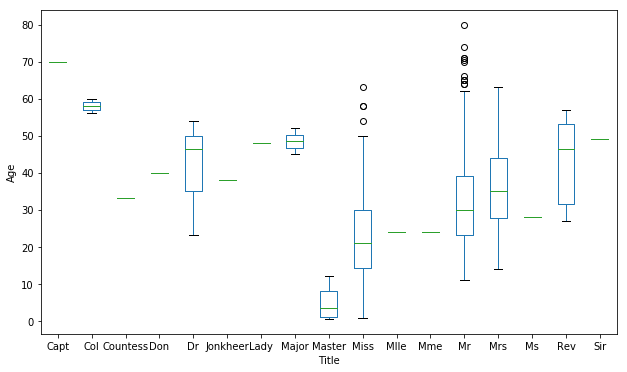

In [77]:
aux[["Age","Title"]].boxplot(by="Title",figsize = (10,6),grid=False)
plt.title("")
plt.suptitle("")
plt.ylabel("Age")
plt.xlabel("Title")
plt.show()

In [78]:
# Create dimensions
title_dim = go.parcats.Dimension(values=aux.Title, label="Title")

gender_dim = go.parcats.Dimension(values=aux.Gender, label="Gender")

class_dim = go.parcats.Dimension(
    values=aux.Pclass,
    categoryorder='category ascending', label="Class"
)

survival_dim = go.parcats.Dimension(
    values=aux.Survived, label="Outcome", categoryarray=[0, 1], 
    ticktext=['perished', 'survived']
)

# Create parcats trace
color = aux.Survived
colorscale = [[0, 'lightsteelblue'], [1, 'mediumseagreen']]

fig = go.Figure(data = [go.Parcats(dimensions=[gender_dim,class_dim, title_dim,survival_dim],
        line={'color': color, 'colorscale': colorscale},
        hoveron='color', hoverinfo='all',
        labelfont={'size': 18, 'family': 'Times'},
        tickfont={'size': 16, 'family': 'Times'},bundlecolors=True, 
        arrangement='freeform')])
fig.update_layout(width=800,height=500)

fig.show()

In [0]:
aux.loc[~aux.Title.isin(["Mr","Mrs","Miss","Master"]),"Title"] = "other"

In [0]:
## fill null values using the mode
aux.Embarked.fillna("S",inplace=True)

In [85]:
# Create dimensions
embarked_dim = go.parcats.Dimension(values=aux.Embarked, label="Embarked")

gender_dim = go.parcats.Dimension(values=aux.Gender, label="Gender")

class_dim = go.parcats.Dimension(
    values=aux.Pclass,
    categoryorder='category ascending', label="Class"
)

survival_dim = go.parcats.Dimension(
    values=aux.Survived, label="Outcome", categoryarray=[0, 1], 
    ticktext=['perished', 'survived']
)

# Create parcats trace
color = aux.Survived
colorscale = [[0, 'lightsteelblue'], [1, 'mediumseagreen']]

fig = go.Figure(data = [go.Parcats(dimensions=[gender_dim,class_dim, embarked_dim,survival_dim],
        line={'color': color, 'colorscale': colorscale},
        hoveron='color', hoverinfo='all',
        labelfont={'size': 18, 'family': 'Times'},
        tickfont={'size': 16, 'family': 'Times'},bundlecolors=True, 
        arrangement='freeform')])
fig.update_layout(width=800,height=500)

fig.show()

### 1.9.3 Family

In [0]:
aux = train.copy()

In [0]:
aux["Title"] = aux["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)
titles = {
        "Mr" :         "man",
        "Mme":         "woman",
        "Ms":          "woman",
        "Mrs" :        "woman",
        "Master" :     "boy",
        "Mlle":        "woman",
        "Miss" :       "woman",
        "Capt":        "man",
        "Col":         "man",
        "Major":       "man",
        "Dr":          "man",
        "Rev":         "man",
        "Jonkheer":    "man",
        "Don":         "man",
        "Sir" :        "man",
        "Countess":    "woman",
        "Dona":        "woman",
        "Lady" :       "woman"
    }

# new gender: man, woman, boy
aux["Gender"] = aux["Title"].map(titles)

# family surname
aux["family"] = aux["Name"].str.extract('([A-Za-z]+)\,',expand=False)

# count the number of boy and women by family
boy_women = aux[aux["Gender"] != "man"].groupby(by=["family"])["Name"].agg("count")

# fill with zero that passengers are traveling alone or with family without boy and women
aux["family_size"] = aux["family"].map(boy_women).fillna(0.0)

In [220]:
# Create dimensions
family_dim = go.parcats.Dimension(values=aux.family_size, label="Family Size")

gender_dim = go.parcats.Dimension(values=aux.Gender, label="Gender")

class_dim = go.parcats.Dimension(
    values=aux.Pclass,
    categoryorder='category ascending', label="Class"
)

survival_dim = go.parcats.Dimension(
    values=aux.Survived, label="Outcome", categoryarray=[0, 1], 
    ticktext=['perished', 'survived']
)

# Create parcats trace
color = aux.Survived
colorscale = [[0, 'lightsteelblue'], [1, 'mediumseagreen']]

fig = go.Figure(data = [go.Parcats(dimensions=[gender_dim,class_dim,family_dim,survival_dim],
        line={'color': color, 'colorscale': colorscale},
        hoveron='color', hoverinfo='all',
        labelfont={'size': 18, 'family': 'Times'},
        tickfont={'size': 16, 'family': 'Times'},bundlecolors=True, 
        arrangement='freeform')])
fig.update_layout(width=800,height=500)

fig.show()

## 1.10 Investigating scoreboard

In [0]:
scoreboard = pd.read_csv("titanic_public.csv")
scoreboard["SubDate"] = pd.to_datetime(scoreboard.SubmissionDate).dt.strftime("%Y/%m/%d")
scoreboard.head()

,TeamId,TeamName,SubmissionDate,Score,SubDate
0,28035,Dhawal Joharapurkar,2012-11-12 03:56:38,0.76555,2012/11/12
1,29226,tR@veller,2012-11-28 21:49:38,0.00000,2012/11/28
2,29226,tR@veller,2012-11-29 05:53:48,0.76076,2012/11/29
3,34454,Raghavendra Rao,2013-02-11 17:35:40,0.77033,2013/02/11
4,34454,Raghavendra Rao,2013-02-18 17:00:18,0.78468,2013/02/18


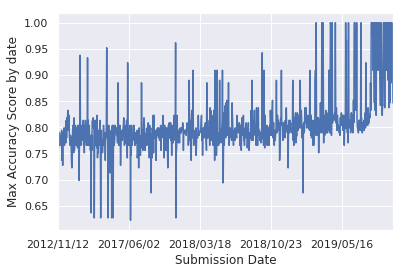

In [0]:
scoreboard[scoreboard.Score >= 0.6].groupby(by="SubDate").agg("max")["Score"].plot()
plt.xlabel("Submission Date")
plt.ylabel("Max Accuracy Score by date")
plt.show()

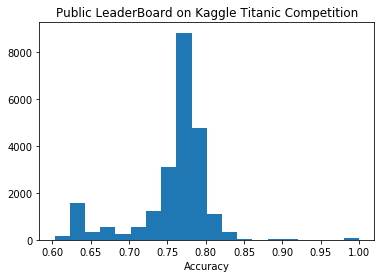

In [0]:
scoreboard[scoreboard.Score >= 0.6].Score.hist(bins=20,grid=False)
plt.xlabel('Accuracy')
plt.title("Public LeaderBoard on Kaggle Titanic Competition")
plt.show()

## 1.11 Next Steps




There are many things we can do to improve the accuracy of our model. Here are some that we will cover in the next sections:
- Improving the features:
    - Feature Engineering: Create new features from the existing data.
    - Feature Selection: Select the most relevant features to reduce noise and overfitting.
- Improving the model:
    - Model Selection: Try a variety of models to improve performance.
    - Hyperparameter Optimization: Optimize the settings within each particular machine learning model.